# classification
## quantum neural networks experimentation

### index
1. [imports](#imports)
2. [data](#data)
3. [classical classification](#classical-classification)

### imports <a class="anchor" id="imports"></a>

In [2]:
# utils imports
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn import datasets
import time
# classical imports
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
# quantum imports
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
#constants
algorithm_globals.random_seed = 33


### data <a class="anchor" id="data"></a>

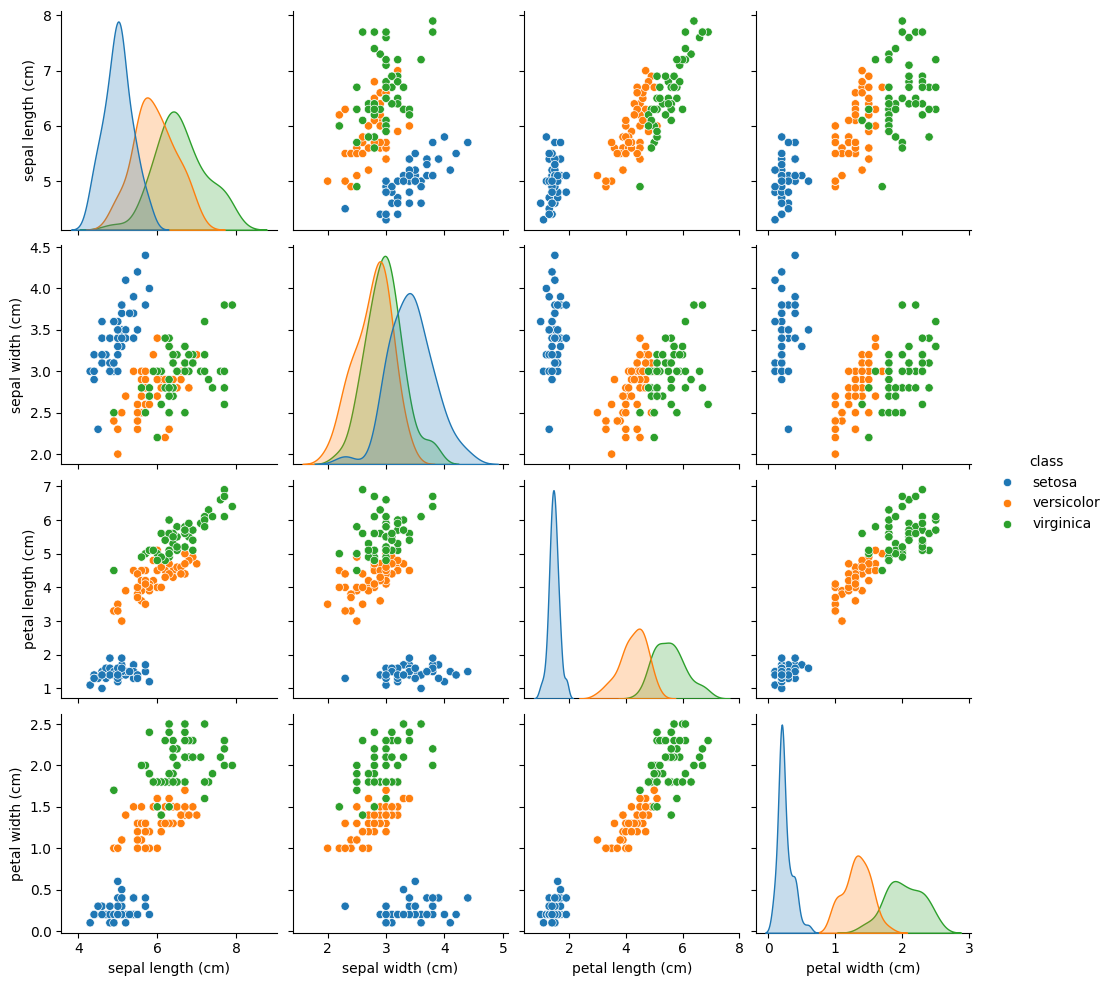

In [3]:
# we load the iris data set
iris = datasets.load_iris()
data = iris.data
target = iris.target
# we split the data into training  and test data sets using 80/20 split
train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.8, random_state=algorithm_globals.random_seed
)
# we visualize the data using a pairplot
df = pd.DataFrame(data, columns=iris.feature_names)
df["class"] = pd.Series(target).map({0: "setosa", 1: "versicolor", 2: "virginica"})
sns.pairplot(df, hue="class", palette="tab10")

### classical <a class="anchor" id="classical-classification"></a>

training time: 0.18 sec


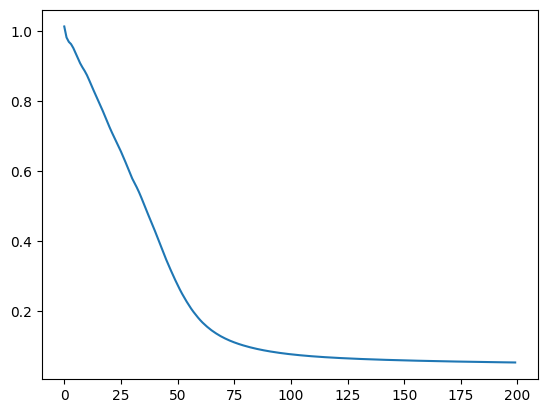

In [4]:
# we define a multilayer perceptron classifier with 2 hidden layers of 5 neurons each
# we set the learning rate to 0.01
mlp = MLPClassifier(learning_rate_init=0.01, hidden_layer_sizes=(5,5), random_state=33)
start = time.time()
mlp.fit(train_data, train_target)
end = time.time()
# we visualize the loss curve and the elapsed training time
plt.plot(mlp.loss_curve_)
print(f"training time: {end-start:.2f} sec")

In [5]:
# we evaluate the model accuracy on the training and test data sets
cl_train_score = mlp.score(train_data, train_target)
cl_test_score = mlp.score(test_data, test_target)
print(f"classical train accuracy: {cl_train_score:.2f}")
print(f"classical test accuracy: {cl_test_score:.2f}")

classical train accuracy: 0.98
classical test accuracy: 1.00


### quantum <a class="anchor" id="quantum-classification"></a>

visualizing the feature map


c:\Users\adrfd\Desktop\4isw\tfg\quantum-neural-networks\.venv\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:267: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: c:\Users\adrfd\Desktop\4isw\tfg\quantum-neural-networks\.venv\Lib\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


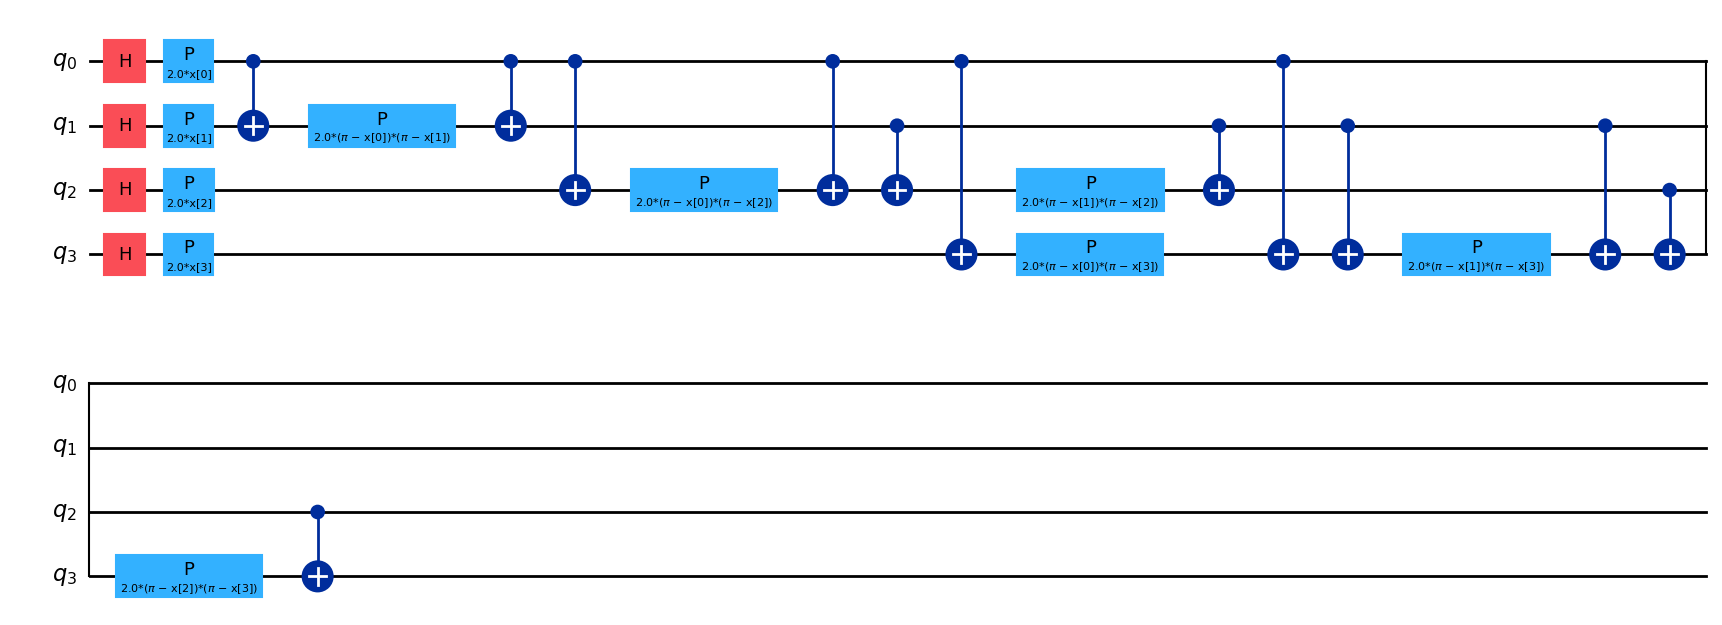

In [8]:
# we get the number of features of our data, this will be the number of qubits of our quantum circuit
num_features = data.shape[1]

# we define the feature map for our quantum circuit
print("visualizing the feature map")
feature_map = ZZFeatureMap(num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="iqx")

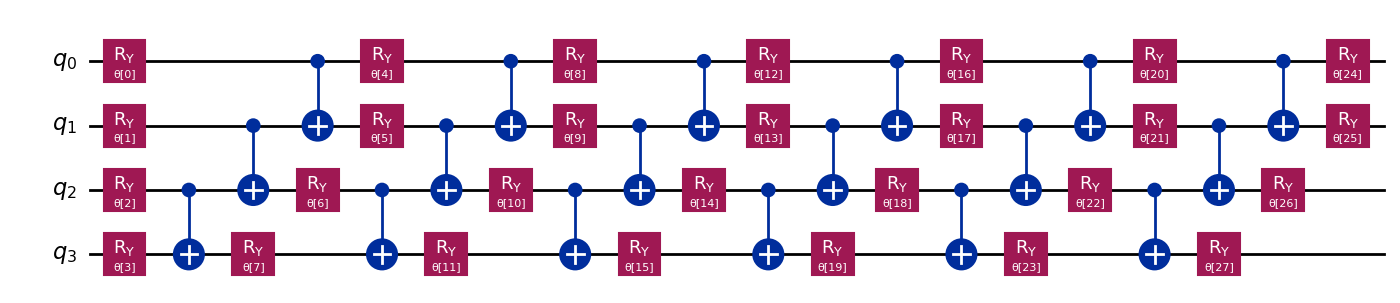

In [9]:
# we define the ansatz for our quantum circuit
ansatz = RealAmplitudes(num_features, reps=6)
ansatz.decompose().draw(output="mpl", style="iqx")

In [10]:
# we choose our optimizer algorithm
optimizer = COBYLA(maxiter=200)

In [11]:
# we define where to train this model, in this case we will use a simulator
sampler = Sampler()

In [12]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("objective function value against iteration")
    plt.xlabel("iteration")
    plt.ylabel("objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

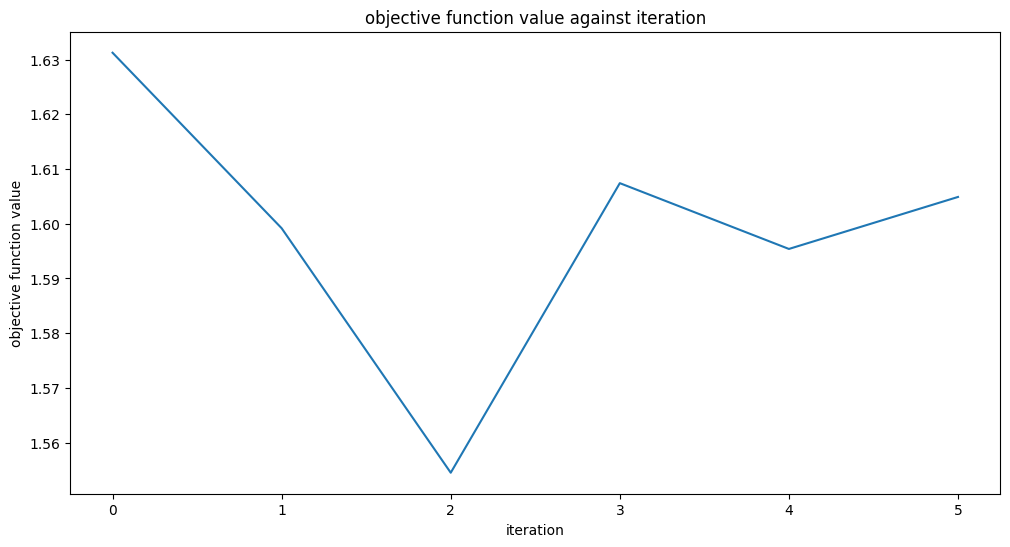

KeyboardInterrupt: 

In [13]:
objective_func_vals = []
# we define the variational quantum circuit
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)
start = time.time()
vqc.fit(train_data, train_target)
end = time.time()
print(f"training time: {end-start:.2f} sec")

In [18]:
q_train_score = vqc.score(train_data, train_target)
q_test_score = vqc.score(test_data, test_target)

print(f"quantum train accuracy: {q_train_score:.2f}")
print(f"quantum test accuracy: {q_test_score:.2f}")

quantum train accuracy: 0.78
quantum test accuracy: 0.83
